 **The Spark Foundation**

Data Science and Business Analytics Internship 

GRIP JUNE 2021


**Task 1-**
**Prediction using Supervised ML (Level - Beginner)**

**Poblem Statement**

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

**To Predict**

What will be predicted score if a student studies for 9.25 hrs/ day?

**Author - Deepak Verma**

**step:1-- Importing all libraries required in this notebook**

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error



**Step:2-- Reading data from csv file and visualization**

In [13]:
data = pd.read_csv('http://bit.ly/w-data')
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


CHECK IF THERE IS ANY NULL VALUE IN THE DATASET

In [17]:
data.isnull==True

False

There is no null value so we can now visualize our data

In [18]:
data.head().columns

Index(['Hours', 'Scores'], dtype='object')

In [19]:
data.head().shape

(5, 2)

In [22]:
train,test = train_test_split(data.head(),test_size=0.25,random_state=123)

In [23]:
train.shape

(3, 2)

In [24]:
test.shape

(2, 2)

In [25]:
train_x=train.drop("Scores",axis=1)
train_y=train["Scores"]

In [26]:
test_x=test.drop("Scores",axis=1)
test_y=test["Scores"]

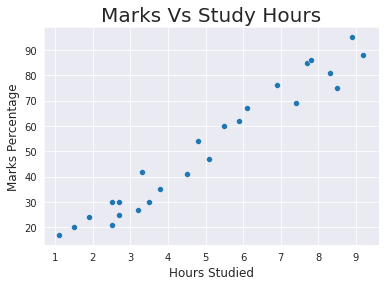

In [27]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'],x= data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage',size=12)
plt.xlabel('Hours Studied',size=12)
plt.show()

Form the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied',Lets plot a regression line to confirm the correlation.

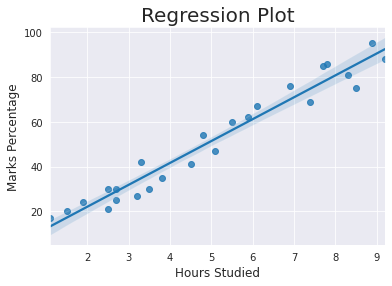

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [28]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage',size=12)
plt.xlabel('Hours Studied',size=12)
plt.show()
print(data.corr())

**Step:4 --- Training the Algorithm**

SPLITTING THE DATA

In [30]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state= 0)

FITTING THE DATA INTO THE MODEL

In [34]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("---------Model Trained---------")

---------Model Trained---------


PREDICTING THE PERCENTAGE  OF MARKS


In [35]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


COMPARING THE PREDICTED MARKS WITH THE ACTUAL MARKS

In [36]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


VISUALLY COMPARING THE PREDICTED MARKS WITH THE ACTUAL MARKS

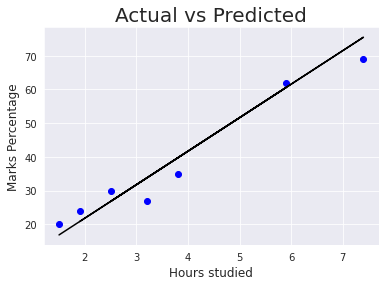

In [37]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours studied', size=12)
plt.show()

**Step:5 --EVALUATING THE MODEL**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [42]:
print('Mean absolute error: ',mean_absolute_error(val_y , pred_y))

Mean absolute error:  4.130879918502482


**Step:7 -- Solution**

In [45]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.

